# White House Staff Exploration
In this notebook we are going to explore data on White House staff from 2015. The data set contains these columns:
* Name -- the name of the employee.
* Status -- whether the employee was a White House employee, or detailed to the White House.
* Salary -- the employee salary, in USD.
* Pay Basis -- the time period the salary is expressed over.
* Position Title -- the title of the employee.

Let's get started by loading in the data set and taking a look inside.

In [144]:
import pandas as pd
white_house = pd.read_csv("2015_white_house.csv")
print(white_house.shape)

(474, 5)


In [145]:
print(white_house.iloc[0])

Name              Abdullah, Hasan A.
Status                      Detailee
Salary                        105960
Pay Basis                  Per Annum
Position Title        POLICY ADVISOR
Name: 0, dtype: object


In [146]:
white_house.head(10)

,Name,Status,Salary,Pay Basis,Position Title
0,"Abdullah, Hasan A.",Detailee,105960,Per Annum,POLICY ADVISOR
1,"Abraham, Sabey M.",Employee,55000,Per Annum,ENERGY AND ENVIRONMENT DIRECTOR FOR PRESIDENTI...
2,"Abraham, Yohannes A.",Employee,121200,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND CHIEF O...
3,"Abramson, Jerry E.",Employee,155035,Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DIRECTOR...
4,"Adler, Caroline E.",Employee,114000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
5,"Aiyer, Vikrum D.",Detailee,134662,Per Annum,SENIOR POLICY ADVISOR
6,"Alcantara, Elias",Employee,65650,Per Annum,ASSOCIATE DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
7,"Ali, Mohammed I.",Employee,42000,Per Annum,STAFF ASSISTANT
8,"Allen, Angelica P.",Employee,50000,Per Annum,SPECIAL ASSISTANT TO THE DIRECTOR OF THE OFFIC...
9,"Allen, Elizabeth M.",Employee,103000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR MESSAGE...


After seeing what columns of data we have available to us, a few questions come to mind for exploration:
* Who are the highest and lowest paid staffers?
* How does length of employee title correlate to salary?
* How much does the White House pay in total salary?
* What words are the most common in titles?

Let's start with some visualizations to guide our exploration of these questions.

# Highest and lowest paid staffers

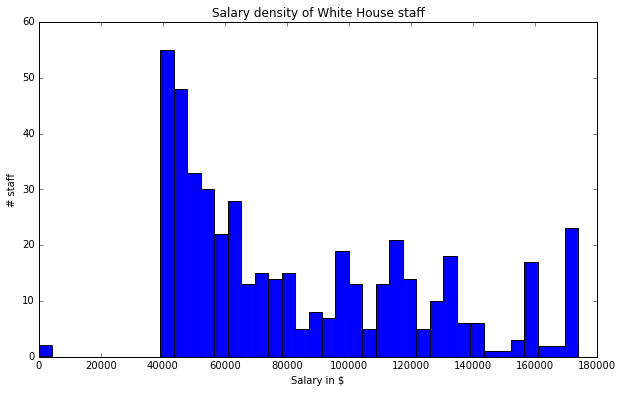

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_title('Salary density of White House staff')
ax.set_xlabel('Salary in $')
ax.set_ylabel('# staff')
plt.hist(white_house['Salary'], bins=40)
plt.show()

We can see from the above histogram that the largest concentration of salaries are in the \$40,000 - $50,000 range. There appears to be some staff that earn nothing, and at the other end of the spectrum we see a spike in the number of staff earning the highest salary when you would generally expect the highest earners to be fewer if not individual. Let's see what the corresponding job titles are to better understand these observations.

### Salaries below \$50,000

In [147]:
white_house[white_house['Salary'] < 50000].head(10)

,Name,Status,Salary,Pay Basis,Position Title
7,"Ali, Mohammed I.",Employee,42000,Per Annum,STAFF ASSISTANT
10,"Allen, Jessica L.",Employee,42844,Per Annum,PRESS ASSISTANT
12,"Amendolare, Vincent C.",Employee,42420,Per Annum,ANALYST
17,"Ashton, Nathaniel R.",Employee,42000,Per Annum,STAFF ASSISTANT
21,"Bae, Yena",Employee,44000,Per Annum,SENIOR ANALYST AND PROJECT MANAGER
24,"Barnes, Desiree N.",Employee,42844,Per Annum,PRESS ASSISTANT
26,"Beckford, Kevin F.",Employee,42000,Per Annum,ANALYST
30,"Bentley, Lauren G.",Employee,45450,Per Annum,TRAVEL PLANNER
31,"Berg, Kristen E.",Employee,45450,Per Annum,STENOGRAPHER
39,"Bleiweis, Alexander A.",Employee,45450,Per Annum,ASSOCIATE DIRECTOR FOR SCHEDULING CORRESPONDENCE


At a glance the word 'assistant' seems to be quite popular in these position titles. Let's confirm.

In [39]:
salary_less_than_50k = white_house[white_house['Salary'] < 50000]
words = salary_less_than_50k['Position Title'].str.cat(sep=' ')
tokenize_words = words.split(" ")
title_words = {}
for word in tokenize_words:
    if word in title_words:
        title_words[word] += 1
    else:
        title_words[word] = 1
print('Most common word in position titles of salaries < 50000: \n', max(title_words, key=title_words.get))

Most common word in position titles of salaries < 50000: 
 ASSISTANT


### Lowest Salaries

In [30]:
white_house[white_house['Salary'] == white_house['Salary'].min()]

,Name,Status,Salary,Pay Basis,Position Title
243,"Leary, Kimberlyn R.",Employee,0,Per Annum,ADVISOR TO THE COUNCIL ON WOMEN AND GIRLS
326,"Park, Todd Y.",Employee,0,Per Annum,ADVISOR FOR TECHNOLOGY


Some quick google and linkedin research shows that Todd Park was a paid staffer in the White House who recently left (2012-2014) but remained on in a smaller capacity as an advisor; meanwhile Kimberlyn Leary is an associate professor at Harvard Medical school and serves on many boards/foundations and also works as a consultant. The lack of pay for these advisory positions is more understandable in light of this information, but are these the only advisors? And if not, then what is different about these positions?

In [151]:
advisor_title = []
for title in white_house['Position Title']:
    words = title.split(' ')
    if 'ADVISOR' in words:
        advisor_title.append(title)
advisor_title.sort()
advisor_title = pd.DataFrame(advisor_title, columns=['Advisor positions'])
advisor_title

,Advisor positions
0,ADVISOR FOR TECHNOLOGY
1,ADVISOR TO THE COUNCIL ON WOMEN AND GIRLS
2,ASSISTANT TO THE PRESIDENT AND DEPUTY NATIONAL...
3,ASSISTANT TO THE PRESIDENT AND DEPUTY NATIONAL...
4,ASSISTANT TO THE PRESIDENT AND NATIONAL SECURI...
5,ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR
6,ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR
7,ASSISTANT TO THE PRESIDENT FOR HOMELAND SECURI...
8,CHIEF OF STAFF AND SENIOR ADVISOR TO THE DIREC...
9,DEPUTY ASSISTANT TO THE PRESIDENT AND ADVISOR ...


What is interesting here is that our zero-salary positions are the only ones that begin with Advisor in the title (the first two in the list above). It appears that if your position is only an "Advisor for" or "Advisor to" then it is a zero-salary position. Researching tasks of these positions or the naming conventions is beyond the scope of this analysis, but it is interesting that perhaps the difference between a paid and non-paid advisor could be deduced from the position title itself.

### Highest Salaries

In [148]:
white_house[white_house['Salary'] == white_house['Salary'].max()]

,Name,Status,Salary,Pay Basis,Position Title
52,"Breckenridge, Anita J.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...
70,"Canegallo, Kristie A.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...
90,"Cushman, Chase M.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SCH...
117,"Earnest, Joshua R.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND PRESS SECRETARY
121,"Eggleston, Warren N.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND COUNSEL TO THE ...
130,"Fallon, Katherine B.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...
200,"Jarrett, Valerie B.",Employee,173922,Per Annum,SENIOR ADVISOR AND ASSISTANT TO THE PRESIDENT ...
201,"Johnson, Broderick D.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND CABINET SECRETARY
210,"Kale, Katy A.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT FOR MANAGEMENT AND ...
216,"Keenan, Cody S.",Employee,173922,Per Annum,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SPE...


Although "assistant's", broadly labelled, generally tend to be viewed as a lower salary job, it appears that an assistant to the president is an exception! It is also curious to see how normalized these assistant position salaries are.

# Length of position title and salary

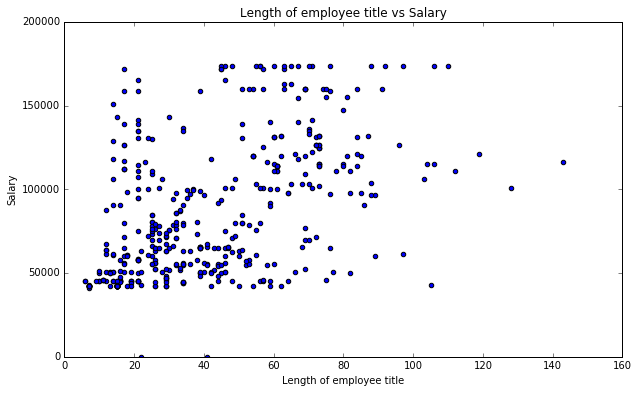

,Salary,PT_length
Salary,1.000000,0.532837
PT_length,0.532837,1.000000


In [149]:
title_length = []
for title in white_house['Position Title']:
    title_length.append(len(title))
white_house['PT_length'] = title_length

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_title('Length of employee title vs Salary')
ax.set_xlabel('Length of employee title')
ax.set_ylabel('Salary')
plt.scatter(white_house['PT_length'], white_house['Salary'])
plt.axis([0, 160, 0, 200000])
plt.show()

white_house.corr()

A correlation > 0.5 is generally considered to be a large correlation, therefore, we can reasonably conclude that there is a positive correlation between the length of an employee title and their salary. This seems reasonable because it suggests that as a position becomes more specialized it generally becomes more valued or requires more skills and training.

# Total White House Salary

In [124]:
total_salary = white_house['Salary'].sum()
total_salary

40225595

The White House pays out over 40 million dollars a year in salaries to it's staff.

# Most common words in all titles

In [141]:
import operator

words = white_house['Position Title'].str.cat(sep=' ')
tokenize_words = words.split(" ")
title_words = {}
for word in tokenize_words:
    if word in title_words:
        title_words[word] += 1
    else:
        title_words[word] = 1
sorted_title_words = sorted(title_words.items(), key=operator.itemgetter(1))
sorted_title_words.reverse()
sorted_title_words[0:10]

[('THE', 218),
 ('ASSISTANT', 215),
 ('TO', 172),
 ('AND', 168),
 ('OF', 155),
 ('DIRECTOR', 146),
 ('PRESIDENT', 135),
 ('SPECIAL', 102),
 ('FOR', 97),
 ('DEPUTY', 86)]

Ignoring words like 'the', 'to', 'and', etc. we see that ASSISTANT and PRESIDENT are the first and third most common words. Since there is only one President, lets see how often 'ASSISTANT TO THE PRESIDENT' is used.

In [131]:
assistant_to_the_president_count = 0
for title in white_house['Position Title']:
    if 'ASSISTANT TO THE PRESIDENT' in title:
        assistant_to_the_president_count += 1
assistant_to_the_president_count

120

So we now see that of the 215 times ASSISTANT is used and 135 times PRESIDENT is used, 120 of them are used in conjunction for a title involving '...ASSISTANT TO THE PRESIDENT...'. Given the word totals from above the only possible word that can surpass this is DIRECTOR so let's explore those titles.

In [143]:
director_title = []
for title in white_house['Position Title']:
    words = title.split(' ')
    if 'DIRECTOR' in words:
        director_title.append(title)
director_title.sort()
director_title = pd.DataFrame(director_title, columns=['Director positions'])
director_title

,Director positions
0,ASSISTANT DIRECTOR FOR CONSTITUENT ENGAGEMENT ...
1,ASSISTANT DIRECTOR OF THE COUNCIL ON WOMEN AND...
2,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF COM...
3,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF PRE...
4,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SCH...
5,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SPE...
6,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...
7,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...
8,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...
9,ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE...


It appears that we can safely conclude that variations on 'ASSISTANT TO THE PRESIDENT' are the most common position titles in the White House after the broader categories involving the individual words 'ASSISTANT' and 'DIRECTOR'.

Looks like the President can never get enough help...

# Wrapping up
In this exploration we found out the following:
* Some White House Advisors are not paid.
* The lowest paid posistions are, excluding zero-salary positions, 'regular' assistant's (assistant's that are not in the category 'assistant to the President') in the \$40,000-$50,000 range.
* The highest paid positions are (Top) Assistant's to the President, being paid a standardized \$173,922.
* The length of a position title is positively correlated with how much salary the position receives.
* The White House pays over 40 million dollars in salary to it's staff every year.
* 'Assistant', 'Director', and 'President' are the most common un-common words in position titles.
* '...Assistant to the President...' is the most common form of job title in the White House.